<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#-|-About-the-Dataset" data-toc-modified-id="-|-About-the-Dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span><b> <span style="color:#0386f7de">|</span> About the Dataset</b></a></span></li><li><span><a href="#Column-Descriptions" data-toc-modified-id="Column-Descriptions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Column Descriptions</a></span></li><li><span><a href="#-|-Visualization-of-Continuous-Data" data-toc-modified-id="-|-Visualization-of-Continuous-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span> <span style="color:#0386f7de">|</span> Visualization of Continuous Data</a></span></li><li><span><a href="#check-if-there-are-unusual-values" data-toc-modified-id="check-if-there-are-unusual-values-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>check if there are unusual values</a></span></li><li><span><a href="#detect-outlier-values-in-numeric-columns" data-toc-modified-id="detect-outlier-values-in-numeric-columns-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>detect outlier values in numeric columns</a></span></li><li><span><a href="#Remove-outlier-values" data-toc-modified-id="Remove-outlier-values-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Remove outlier values</a></span></li><li><span><a href="#train---test-split-data" data-toc-modified-id="train---test-split-data-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>train - test split data</a></span></li><li><span><a href="#after-oversampling" data-toc-modified-id="after-oversampling-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>after oversampling</a></span></li><li><span><a href="#logistic-regression" data-toc-modified-id="logistic-regression-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>logistic regression</a></span></li><li><span><a href="#decission-tree" data-toc-modified-id="decission-tree-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>decission tree</a></span></li></ul></div>

$$ Project Heart  Disease   $$

<ul style="direction: rtl;font-size:25px;line-height:1.2em">
    <li> 
        <ul> اعضاء الفريق
            <li>منال صبحي عجاج</li>
            <li>  علاء الدين جمال عباس</li>
            <li>منى احمد يسن</li>
            <li>عبدالله حسن آغا</li>
        </ul>
   </li>
  
</ul> 

## <b> <span style='color:#0386f7de'>|</span> About the Dataset</b>

<b> The Heart Disease dataset is a collection of patient medical records that includes various features such as age, sex, blood pressure, cholesterol levels, and whether or not the patient has heart disease. </b> 

## Column Descriptions
- `HeartDisease`: Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI).
- `BMI`: Body Mass Index (BMI).
- `Smoking`: Have you smoked at least 100 cigarettes in your entire life?
- `AlcoholDrinking`: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week
- `Stroke`: (Ever told) (you had) a stroke?
- `PhysicalHealth`: Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0-30 days).
- `MentalHealth`: Thinking about your mental health, for how many days during the past 30 days was your mental health not good? (0-30 days).
- `DiffWalking`: Do you have serious difficulty walking or climbing stairs?
- `Sex`: Are you male or female?
- `AgeCategory`: Fourteen-level age category. (then calculated the mean)
- `Race`: Imputed race/ethnicity value.
- `Diabetic`: (Ever told) (you had) diabetes?
- `PhysicalActivity`: Adults who reported doing physical activity or exercise during the past 30 days other than their regular job.
- `GenHealth`: Would you say that in general your health is...
- `SleepTime`: On average, how many hours of sleep do you get in a 24-hour period?
- `Asthma`: (Ever told) (you had) asthma?
- `KidneyDisease`: Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?
- `SkinCancer`: (Ever told) (you had) skin cancer?

In [105]:
from method_ml import *
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder , StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , confusion_matrix , auc ,roc_auc_score , roc_curve
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier

In [106]:
df = pd.read_csv("heart_2020_cleaned.csv")
df.head(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [107]:
check_df(df)

############Shape############
(319795, 18)
############Types############
HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object
############NA############
HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCanc

<h2> <span style='color:#0386f7de'>|</span> Visualization of Continuous Data</h2>

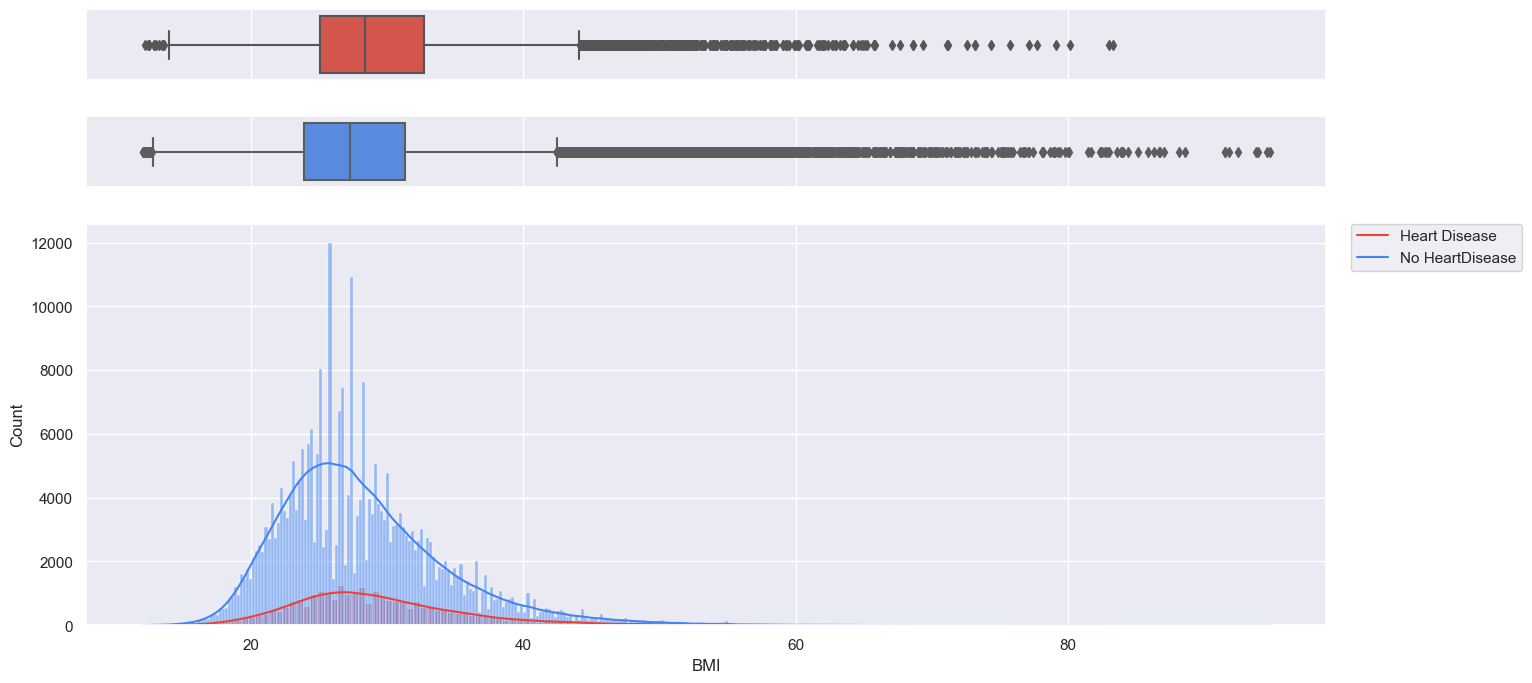

In [108]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(16,8)})
# creating a figure composed of 3 matplotlib.Axes objects
f, (ax_box1, ax_box2, ax_hist) = plt.subplots(3, sharex=True, gridspec_kw={"height_ratios": (.15, .15, .85)})
colours = ['#4285f4', '#ea4335', '#fbbc05', '#34a853']
# assigning a graph to each ax
sns.boxplot(x=df[df['HeartDisease']=='Yes']["BMI"], ax=ax_box1, color="#ea4335")
sns.histplot(df[df['HeartDisease']=='Yes'], x="BMI", ax=ax_hist, kde=True, color="#ea4335")

sns.boxplot(x=df[df['HeartDisease']=='No']["BMI"], ax=ax_box2, color='#4285f4')
sns.histplot(df[df['HeartDisease']=='No'], x="BMI", ax=ax_hist, kde=True, color='#4285f4')
 
# Remove x axis name for the boxplots
ax_box1.set(xlabel='')
ax_box2.set(xlabel='')

plt.legend(title='', loc=2, labels=['Heart Disease', 'No HeartDisease'],bbox_to_anchor=(1.02, 1), borderaxespad=0.)
plt.show()

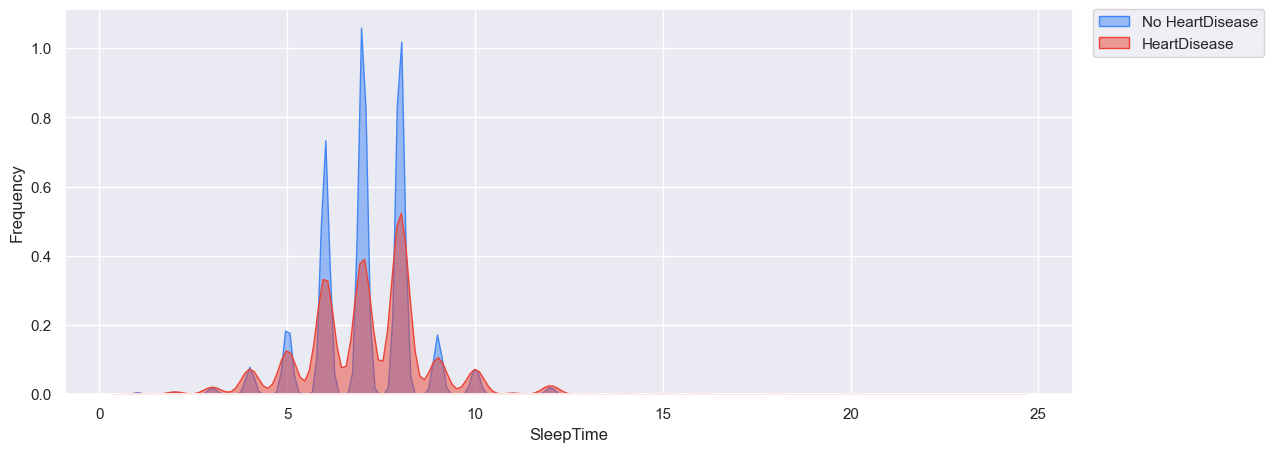

In [109]:
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(df[df["HeartDisease"]=='No']["SleepTime"], alpha=0.5,fill = True, color="#4285f4", label="No HeartDisease", ax = ax)
sns.kdeplot(df[df["HeartDisease"]=='Yes']["SleepTime"], alpha=0.5,fill = True, color="#ea4335", label="HeartDisease", ax = ax)
ax.set_xlabel("SleepTime")
ax.set_ylabel("Frequency")
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.show()

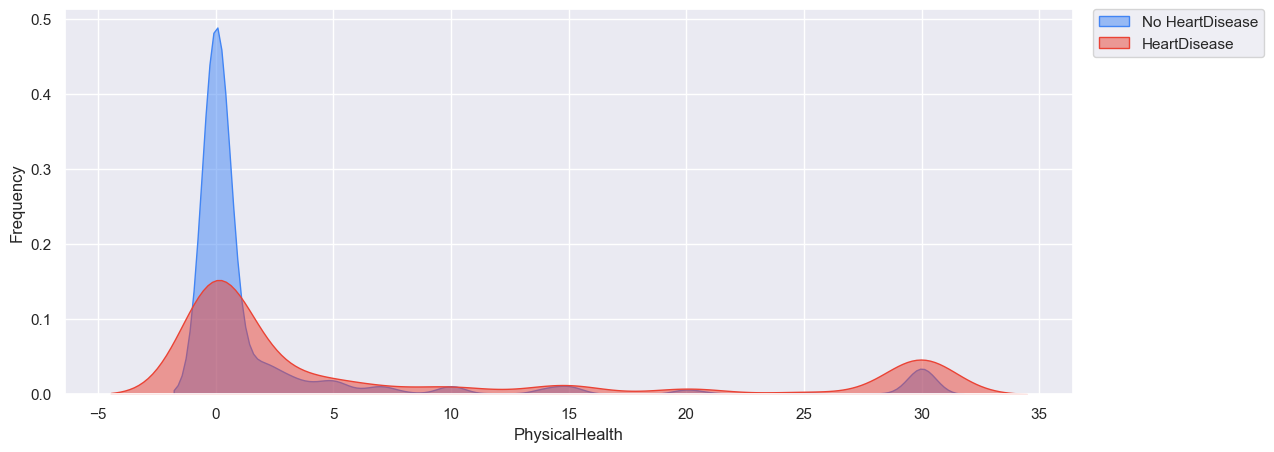

In [110]:
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(df[df["HeartDisease"]=='No']["PhysicalHealth"], alpha=0.5,fill = True, color="#4285f4", label="No HeartDisease", ax = ax)
sns.kdeplot(df[df["HeartDisease"]=='Yes']["PhysicalHealth"], alpha=0.5,fill = True, color="#ea4335", label="HeartDisease", ax = ax)
ax.set_xlabel("PhysicalHealth")
ax.set_ylabel("Frequency")
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.show()

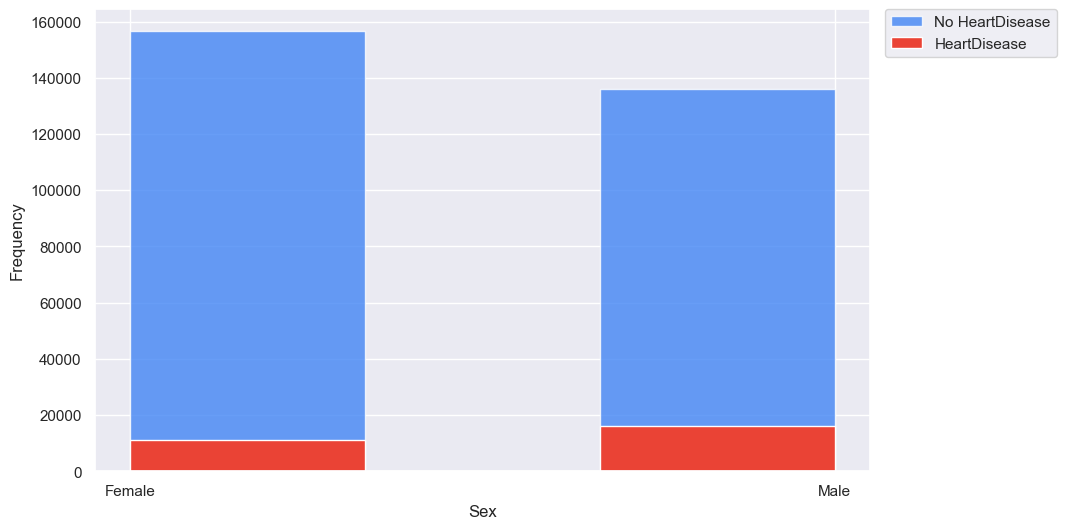

In [111]:
fig, ax = plt.subplots(figsize = (10,6))

ax.hist(df[df["HeartDisease"]=='No']["Sex"], bins=3, alpha=0.8, color="#4285f4", label="No HeartDisease")
ax.hist(df[df["HeartDisease"]=='Yes']["Sex"], bins=3, alpha=1, color="#ea4335", label="HeartDisease")

ax.set_xlabel("Sex")
ax.set_ylabel("Frequency")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

In [112]:
female_with_heart_disease = len(df[(df['HeartDisease']=='Yes') & (df['Sex']=='Female')])
num_female = len(df[df['Sex']=='Female'])
male_with_heart_disease = len(df[(df['HeartDisease']=='Yes') & (df['Sex']=='Male')])
num_male = len(df[df['Sex']=='Male'])
print('Probability of Male to have Heart disease:', male_with_heart_disease/num_male)
print('Probability of Female to have Heart disease:', female_with_heart_disease/num_female)

Probability of Male to have Heart disease: 0.10618461740904007
Probability of Female to have Heart disease: 0.06694675367241738


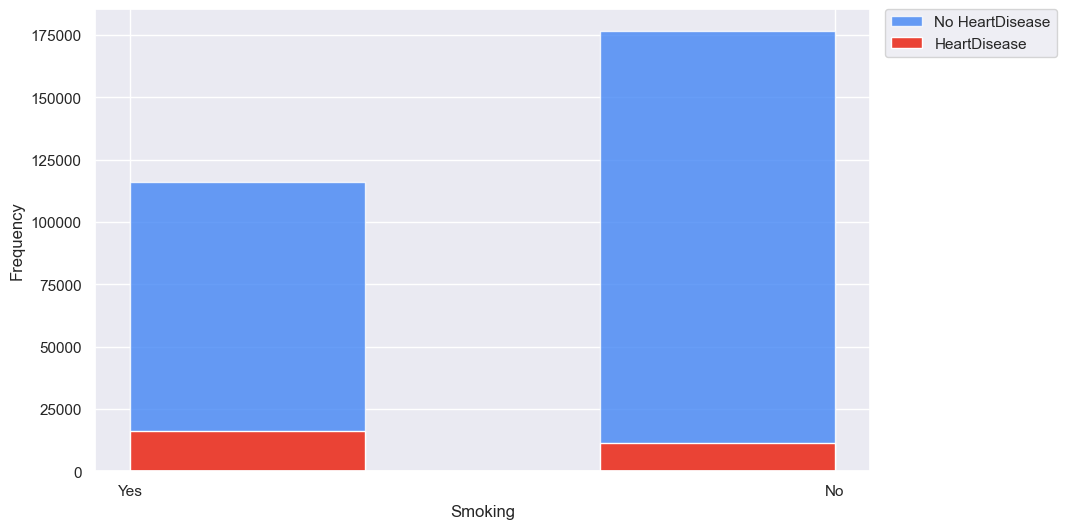

In [113]:
fig, ax = plt.subplots(figsize = (10,6))

ax.hist(df[df["HeartDisease"]=='No']["Smoking"], bins=3, alpha=0.8, color="#4285f4", label="No HeartDisease")
ax.hist(df[df["HeartDisease"]=='Yes']["Smoking"], bins=3, alpha=1, color="#ea4335", label="HeartDisease")

ax.set_xlabel("Smoking")
ax.set_ylabel("Frequency")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

In [114]:
smoke_and_heart_disease = len(df[(df['HeartDisease']=='Yes') & (df['Smoking']=='Yes')])
num_smoke = len(df[df['Smoking']=='Yes'])
no_smoke_and_heart_disease = len(df[(df['HeartDisease']=='Yes') & (df['Smoking']=='No')])
num_no_smoke = len(df[df['Smoking']=='No'])
print('Probability of Heart disease if you smoke:', smoke_and_heart_disease/num_smoke)
print("Probability of Heart disease if you don't smoke:", no_smoke_and_heart_disease/num_no_smoke)

Probability of Heart disease if you smoke: 0.12157715983867544
Probability of Heart disease if you don't smoke: 0.0603341370078824


## check if there are unusual values 

In [115]:
print(f"Unique Values for categorical columns:")
for col in df.select_dtypes(include='object'):
    print(f"  - {col}: {df[col].unique()}\n")

Unique Values for categorical columns:
  - HeartDisease: ['No' 'Yes']

  - Smoking: ['Yes' 'No']

  - AlcoholDrinking: ['No' 'Yes']

  - Stroke: ['No' 'Yes']

  - DiffWalking: ['No' 'Yes']

  - Sex: ['Female' 'Male']

  - AgeCategory: ['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']

  - Race: ['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']

  - Diabetic: ['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']

  - PhysicalActivity: ['Yes' 'No']

  - GenHealth: ['Very good' 'Fair' 'Good' 'Poor' 'Excellent']

  - Asthma: ['Yes' 'No']

  - KidneyDisease: ['No' 'Yes']

  - SkinCancer: ['Yes' 'No']



In [116]:
object_col = df.describe(include='object').columns
print(object_col)
for col in object_col:
    print(f'{col}: \n')
    print(df[col].value_counts(),'\n')
    print('*'*30)

Index(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
       'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity',
       'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')
HeartDisease: 

No     292422
Yes     27373
Name: HeartDisease, dtype: int64 

******************************
Smoking: 

No     187887
Yes    131908
Name: Smoking, dtype: int64 

******************************
AlcoholDrinking: 

No     298018
Yes     21777
Name: AlcoholDrinking, dtype: int64 

******************************
Stroke: 

No     307726
Yes     12069
Name: Stroke, dtype: int64 

******************************
DiffWalking: 

No     275385
Yes     44410
Name: DiffWalking, dtype: int64 

******************************
Sex: 

Female    167805
Male      151990
Name: Sex, dtype: int64 

******************************
AgeCategory: 

65-69          34151
60-64          33686
70-74          31065
55-59          29757
50-54          25382
80 or older    2415

## detect outlier values in numeric columns  

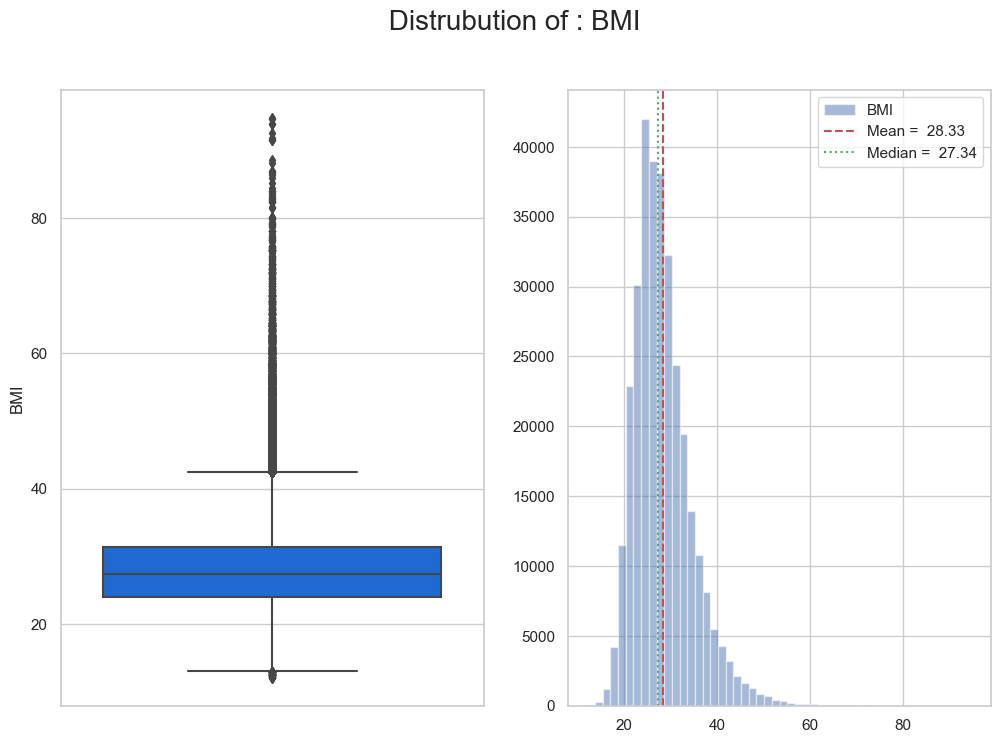

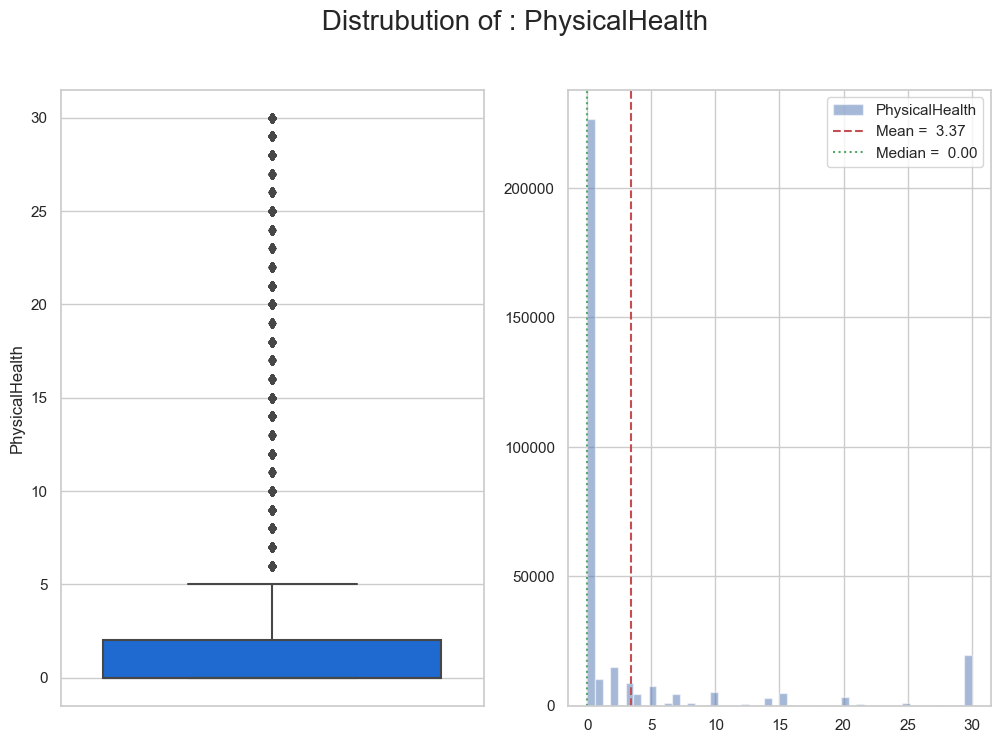

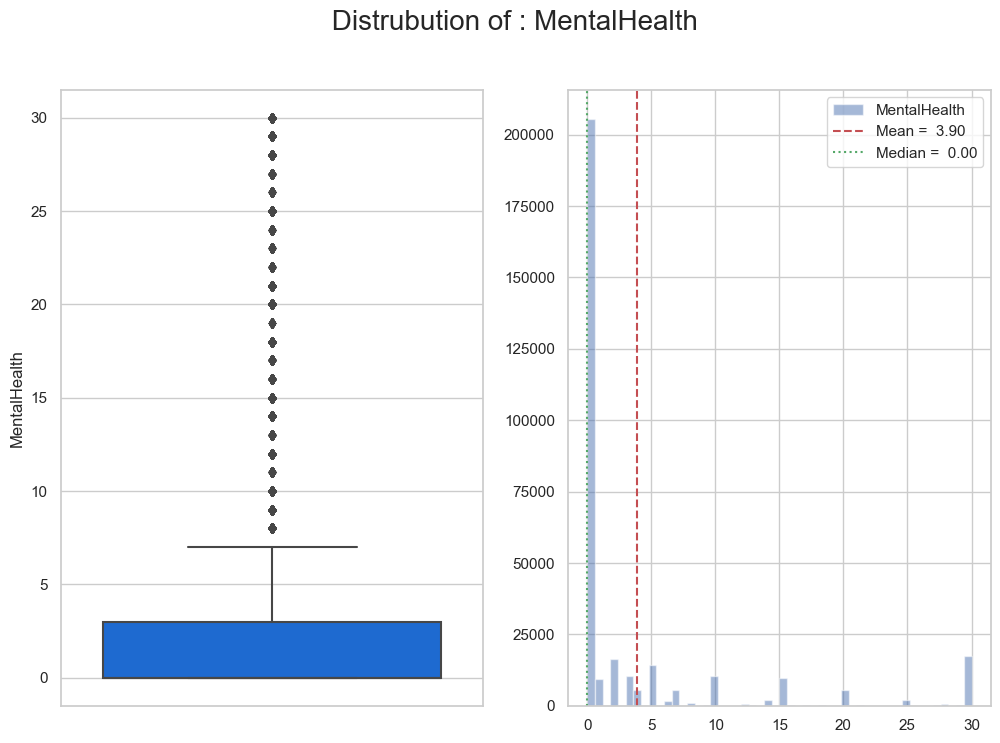

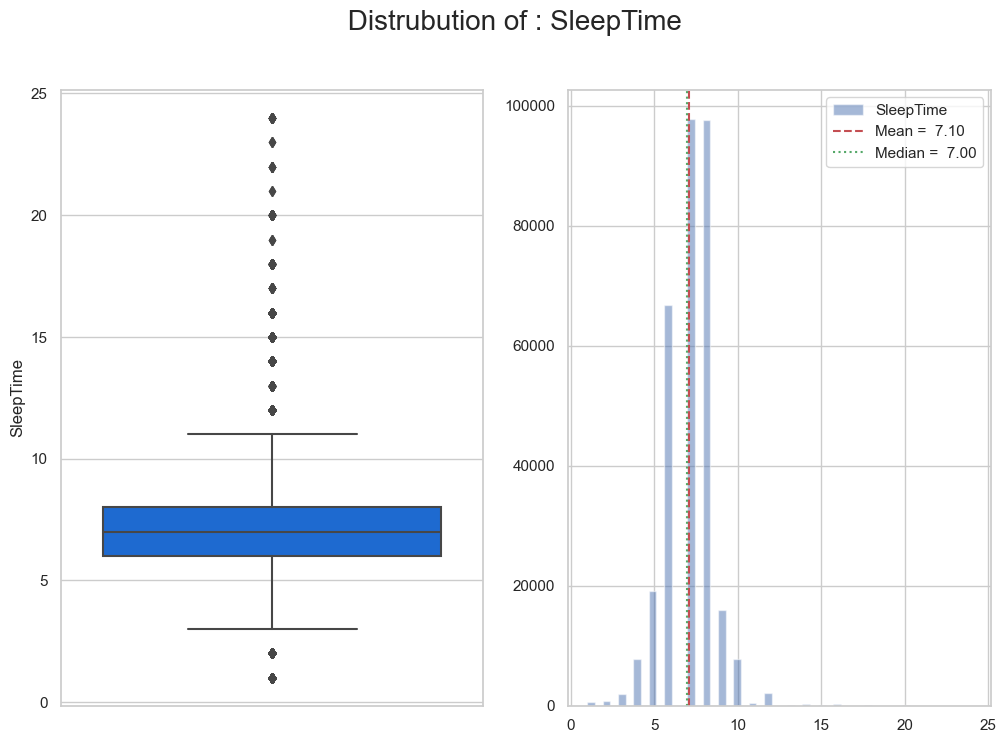

In [117]:
  
numerical = df.select_dtypes(exclude='object')
#n = len(numerical)
sns.set_style('whitegrid')
for col in numerical:
    plt.figure(figsize=(12, 8))
    plt.subplot(1,2,1)
    sns.boxplot(y = df[col] ,color = '#0066ee')
    plt.subplot(1,2,2)
    #plt.scatter(df[col], np.random.normal(7, 0.2, size=df.shape[0]))
    df[col].hist(bins=50 , label = col , alpha = .5)
    mean = '{} {:0.2f}'.format('Mean = ', np.mean(df[col]))
    median = '{} {:0.2f}'.format('Median = ', np.median(df[col]))
    plt.axvline(np.mean(df[col]) , ls = '--' , c = 'r' , label = mean)
    plt.axvline(np.median(df[col]) ,ls = ':' , c = 'g' , label = median)
    plt.legend()
    plt.suptitle(f' Distrubution of : {col}' , size = 20)
    #ax.set_ylabel(col , size = 15)
    plt.show()
    print('\n')

## Remove outlier values

In [118]:
df_copy = df.copy()
for col in numerical:
    Q1, Q3 = df[col].quantile([0.25,0.75])
    IQR = Q3 - Q1
    right = Q3 + 1.5 * IQR
    left = Q1 - 1.5 * IQR
    n = len(df_copy.loc[(df_copy[col] < left) | (df_copy[col] > right)])
    print(f"{col}:\n\tOutlier Num = {n}\n\tOutlier Percentage = {n*100/len(df):.2f}%\n")
    outliers_value = (df_copy[col] > right) | (df_copy[col] < left)
    df_copy = df_copy[~outliers_value]
df_clean = df_copy

BMI:
	Outlier Num = 10396
	Outlier Percentage = 3.25%

PhysicalHealth:
	Outlier Num = 43924
	Outlier Percentage = 13.74%

MentalHealth:
	Outlier Num = 32157
	Outlier Percentage = 10.06%

SleepTime:
	Outlier Num = 2298
	Outlier Percentage = 0.72%



In [119]:
print(df_clean.shape)
print(df.shape)

(231020, 18)
(319795, 18)


In [120]:
obj_cols = df_clean.select_dtypes(include = 'object').columns
num_cols = df_clean.select_dtypes(exclude = 'object').columns

In [121]:
ordenal = OrdinalEncoder()
obj_scale = ordenal.fit_transform(df_clean[obj_cols])
print(obj_scale)
df_clean[obj_cols] = obj_scale



[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [122]:
scaler = StandardScaler()
num_scale = scaler.fit_transform(df_clean[num_cols])
df_clean[num_cols] = num_scale


In [123]:

print(df_clean)

        HeartDisease       BMI  Smoking  AlcoholDrinking  Stroke  \
1                0.0 -1.422409      0.0              0.0     1.0   
3                0.0 -0.653422      0.0              0.0     0.0   
7                0.0  0.822955      1.0              0.0     0.0   
8                0.0 -0.208323      0.0              0.0     0.0   
9                0.0  2.621233      0.0              0.0     0.0   
...              ...       ...      ...              ...     ...   
319786           1.0  1.132934      1.0              0.0     0.0   
319788           0.0 -0.818347      0.0              0.0     0.0   
319789           0.0 -1.048844      0.0              0.0     0.0   
319791           0.0  0.465286      1.0              0.0     0.0   
319792           0.0 -0.647461      0.0              0.0     0.0   

        PhysicalHealth  MentalHealth  DiffWalking  Sex  AgeCategory  Race  \
1            -0.366034     -0.460504          0.0  0.0         12.0   5.0   
3            -0.366034     -0

## train - test split data

In [124]:
x = df_clean.drop(columns=['HeartDisease'])
y = df_clean['HeartDisease']

In [125]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size= 0.25 , random_state=(42))


## after oversampling

In [126]:
sm = SMOTE(random_state = 42)
x ,y =sm.fit_resample(x , y)
x_train_res , x_test_res , y_train_res , y_test_res = train_test_split(x , y , test_size= 0.25 , random_state=(42))

In [127]:
print( 'Before Oversampling , count No : {} '.format(sum(y_train == 0)))
print('Before Oversampling , count Yes : {} '.format(sum(y_train == 1)))
print('='*40)
print('After Oversampling , count No : {} '.format(sum(y_train_res == 0)))
print('After Oversampling , count Yes : {} '.format(sum(y_train_res == 1)))
print('='*40)

Before Oversampling , count No : 161401 
Before Oversampling , count Yes : 11864 
After Oversampling , count No : 161431 
After Oversampling , count Yes : 161307 


In [128]:
model_metrics={'Model' :[] ,
               'Heart Disease precision' :[],
               'No Heart Disease precision':[],
               'Heart Disease Recall' :[],
               'No Heart Disease Recall':[],
               'Heart Disease F1' :[],
               'No Heart Disease F1':[],
               'Accuracy':[]
               }

## logistic regression

Classification report after overSample : 
              precision    recall  f1-score   support

         0.0       0.77      0.71      0.74     53728
         1.0       0.73      0.79      0.76     53852

    accuracy                           0.75    107580
   macro avg       0.75      0.75      0.75    107580
weighted avg       0.75      0.75      0.75    107580

Tranning Accaracy : 0.7490843966313232 
Test Accuracy : 0.7508830637664994 
confusion matrix after oversample :
 [[38219 15509]
 [11291 42561]]
None


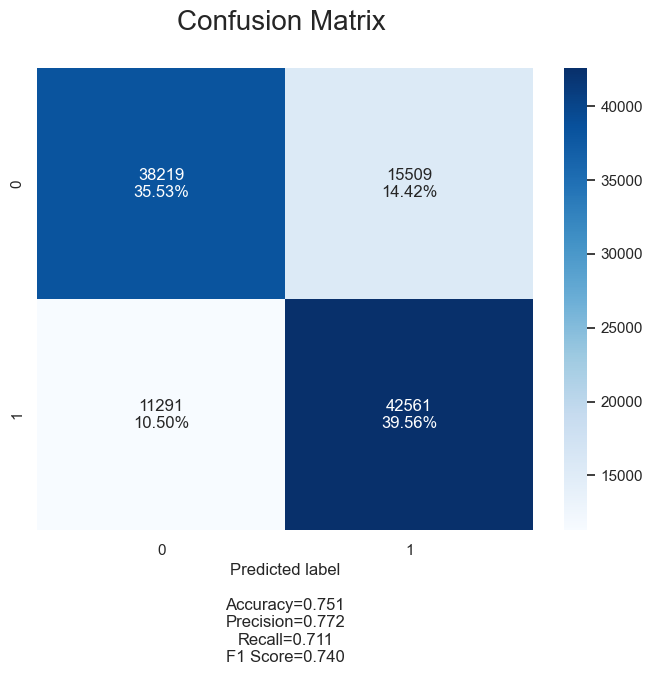

In [137]:
lr = LogisticRegression()
y_predict , report = try_model(df_clean, lr, x_train_res, y_train_res , x_test_res, y_test_res)
cm_afterreoversample = confusion_matrix(y_test_res, y_predict)
print('confusion matrix after oversample :\n {}'.format(cm_afterreoversample))
print(make_confusion_matrix(cm_afterreoversample))
model_metrics['Model'].append('Logistic Regression')
model_metrics['Heart Disease precision'].append(report.split()[10])
model_metrics['No Heart Disease precision'].append(report.split()[5])
model_metrics['Heart Disease Recall'].append(report.split()[11])
model_metrics['No Heart Disease Recall'].append(report.split()[6])
model_metrics['Heart Disease F1'].append(report.split()[12])
model_metrics['No Heart Disease F1'].append(report.split()[7])
model_metrics['Accuracy'].append(report.split()[15])


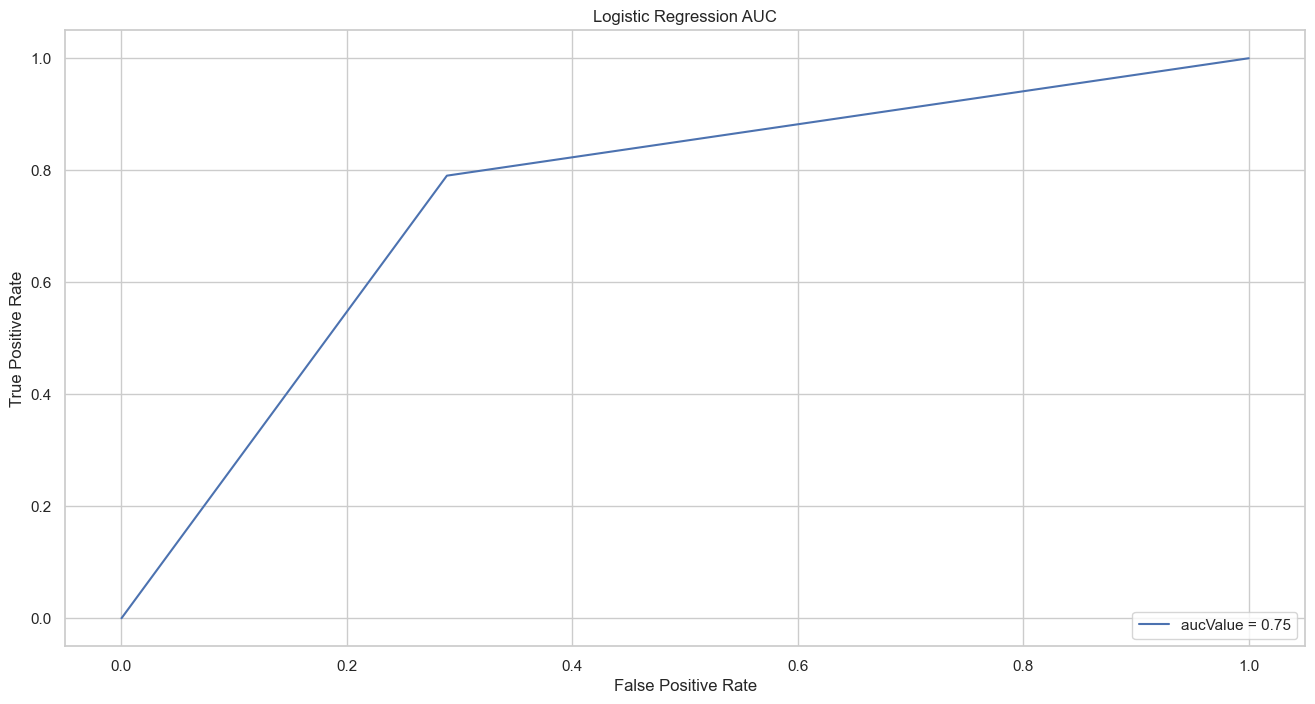

In [138]:
Fpr ,Tpr , Threshoulde = plot_auc_roc('Logistic Regression',y_test_res, y_predict )


## decission tree 

In [ ]:

dt = DecisionTreeClassifier(max_features= 17 , max_depth= 12)
y_pred = try_model(df_clean, dt, x_train_res, y_train_res , x_test_res , y_test_res)

Classification report after overSample : 
              precision    recall  f1-score   support

         0.0       0.86      0.82      0.84     72220
         1.0       0.83      0.87      0.85     72220

    accuracy                           0.84    144440
   macro avg       0.84      0.84      0.84    144440
weighted avg       0.84      0.84      0.84    144440

Tranning Accaracy : 0.7501836613054507 
Test Accuracy : 0.7545970645250623 


confusion matrix : 
[[59222 12998]
 [ 9595 62625]]
None


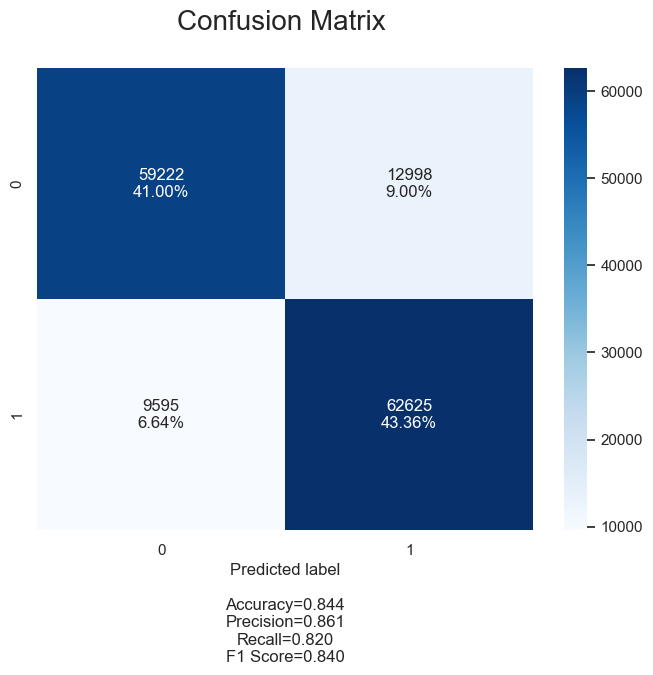

In [ ]:

cm = confusion_matrix(y_test_res, y_pred)
print('confusion matrix : \n{}'.format(cm))
print(make_confusion_matrix(cm))

In [ ]:
model_metrics['Model'].append('Decission Tree')
model_metrics['Heart Disease precision'].append(report.split()[10])
model_metrics['No Heart Disease precision'].append(report.split()[5])
model_metrics['Heart Disease Recall'].append(report.split()[11])
model_metrics['No Heart Disease Recall'].append(report.split()[6])
model_metrics['Heart Disease F1'].append(report.split()[12])
model_metrics['No Heart Disease F1'].append(report.split()[7])
model_metrics['Accuracy'].append(report.split()[15])

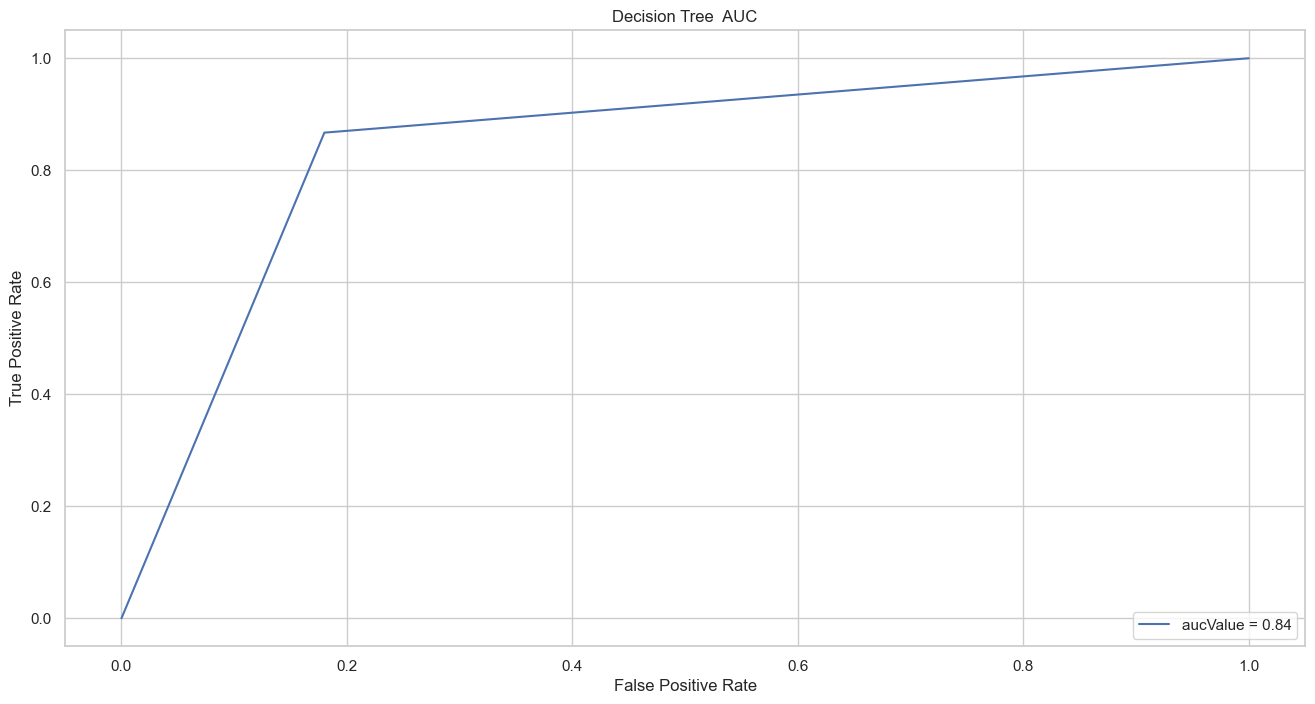

In [ ]:
Fpr ,Tpr , Threshoulde = plot_auc_roc('Decision Tree ',y_test_res, y_pred )



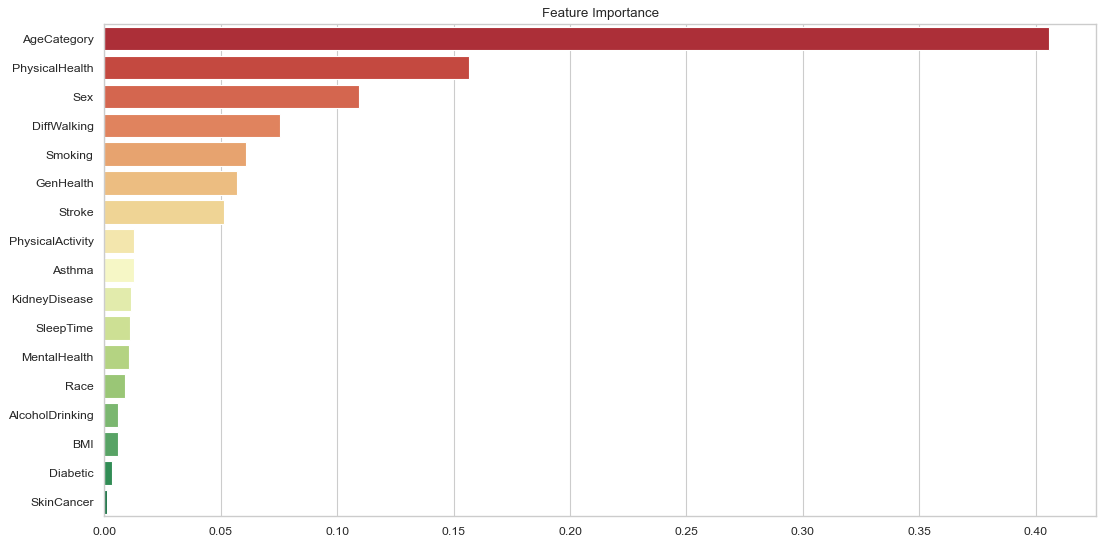

In [ ]:
features_names = df_clean.columns.drop('HeartDisease').to_list()
f_importances(abs(dt.feature_importances_), features_names)


In [ ]:
#comparsion models
comparsion_models = pd.DataFrame(model_metrics)
comparsion_models = comparsion_models.set_index('Model')
print(comparsion_models)

                     Heart Disease precision  No Heart Disease precision  \
Model                                                                      
Logistic Regression                     0.74                        0.77   
Decission Tree                          0.83                        0.86   

                     Heart Disease Recall  No Heart Disease Recall  \
Model                                                                
Logistic Regression                  0.78                     0.73   
Decission Tree                       0.87                     0.82   

                     Heart Disease F1  No Heart Disease F1  Accuracy  
Model                                                                 
Logistic Regression              0.76                 0.75      0.75  
Decission Tree                   0.85                 0.84      0.84  
